# Water waves
In this notebook we will look at hydrodynamics of water waves, or more precisely, free surface waves driven by gravity. When the free surface of water is given a perturbation, an imbalance of gravity forces and buoyancy forces acting on the water is created. This imbalance represent potential energy that will be transformed into kinetic energy, i.e. water motions, when nature seek to return to equilibrium. However, if there is no dissipation of energy from the wave, we have a system whose energy is alternating between potential energy (free surface displacement) and kinetic energy (water motion).

## Wave speed
If we observe free surface waves in water, we observe that waves with different wavelengths propagate with different speeds. For instance, if you throw a stone in the water, after the initial splash, you will see that the leading ring-shaped waves have longer wave lenghts than the waves coming after. The difference in wave speeds cause a spreading or dispersion of the waves generated from the initial perturbation. The propagation speed of a wave crest, called the phase speed, is found as 
$$C_w=\lambda/T=\omega/k$$
For water waves, the phase speed $C_w$ depends on the wave freqency where there is a special relation between the wave freqency $\omega$ and the wave number $k$. For waves on deep water, this relation is 
$$\omega^2=gk\qquad \mathrm{or}\qquad \lambda=\frac{g}{2\pi}T^2$$
and is called the dispersion relation for infinite water depth. Here, $g\approx 9.81 \mathrm{m}/\mathrm{s}^2$ is the gravity acceleration constant.

## Standing waves
First, we look at waves that does not propagate. This can occur if we have two identical waves propagating in opposite directions that interact with each other. The resulting wave will not propagate, but oscillate around a fixed position with amplitude twice the amplitude of the individual waves, and is hence called a *standing wave*. Standing waves also occur if a wave is trapped between vertical wall, e.g. inside a tank or inside harbours.
Mathematically, a standing wave with low steepness can be modelled as
$$\zeta(x,t)=\zeta_a\cos(kx)\cos(\omega t)$$
Let us have a look at this wave profile for a range of time instants

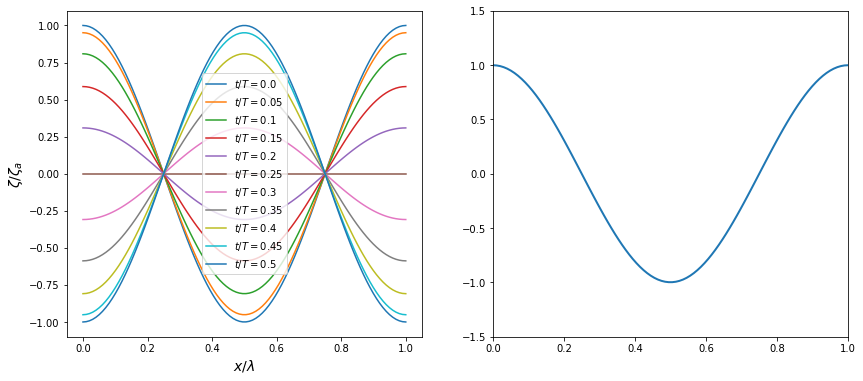

In [1]:
import numpy as np                        # Library for math, linear algebra and vector calculus
import matplotlib.pyplot as plt           # Library for plotting of figures
from matplotlib import gridspec           # Include support for sub-figures

from matplotlib import animation, rc      # Library for making animations
from IPython.display import HTML          # Library to embed animation in html


# Input parameters:
g = 9.81 # [m/s^2] Acceleration of gravity 
T = 2.   # [s] Wave period
A = 0.1

# Derived quantities:
omega = 2*np.pi/T
k = omega**2/g
l = 2*np.pi/k

# Discretization of time and space:
tvec = np.linspace(0,0.5*T, 11)
xvec = np.linspace(0,l,100)

# Create simple inline function for surface elevation using the "lambda" feature in python:
zeta_1 = lambda t: A*np.cos(k*xvec)*np.cos(omega*t)


# Create grid for sub-figures:
gs = gridspec.GridSpec(nrows=1, ncols=2)
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(gs[0,0])
for t1 in tvec:
    plt.plot(xvec/l, zeta_1(t1)/A, label='$t/T=${:.02}'.format(t1/T))
    
plt.xlabel('$x/\lambda$', fontsize=14)
plt.ylabel('$\zeta/\zeta_a$', fontsize=14)
plt.legend()


ax2 = fig.add_subplot(gs[0,1])
ax2.set_xlim(( 0, 1.))
ax2.set_ylim((-1.5, 1.5))


#  Create animation
line, = ax2.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    dt = 0.01*T
    x = xvec/l
    z = zeta_1(i*dt)/A
    line.set_data(x, z)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

We see from the above figure that the wave profile has nodes with zero displacements (zero surface elevation) and anti-nodes where the displacements reaches a maximum value (the wave crests).

## Propagating waves at deep water
A propagating wave cannot have nodes where the surface elevation is always zero. To obtain a propagating wave from the expression of the standing wave, call it $\zeta_1$, we need to add a wave component $\zeta_2$ that is out of phase both in time and in space with the first wave component, such that the new wave compnent is at its maximum at the time when $\zeta_1$ zero, and such that the maximum of $\zeta_2$ occur at the location of a node of $\zeta_1$. This means that
$$\zeta_2=\zeta_a\sin(kx)\sin(\omega t)$$
The combined wave becomes
$$\zeta(x,t)=\zeta_1+\zeta_2=\zeta_a\left(\cos(kx)\cos(\omega t)+\sin(kx)\sin(\omega t)\right)$$
By application of trigonometric identities, we arrive at
$$\zeta(x,t)=\zeta_a\cos(kx-\omega t)$$
If we look at the argument (phase) of the cosine function above, $kx-\omega t$, we see that for given values of $k$ and $\omega$ there are combinations of $x$ and $t$ where the phase does not change, i.e. where $kx-\omega t=Constant$. Let us follow a wave crest at $x_c(t)$, which means $\zeta(x_c(t),t)=\zeta_a$. This requires that $kx_c-\omega t=0$ (as $\cos(0)=1$). If we write $k(x_c-(\omega/k) t)=0$, we see for increasing time $t$ that the location $x_c$ of the wave crest must increase linearly as $(\omega/k) t$. Hence, the speed of the wave crest is $\omega/k=C_w$, which is called the wave speed or phase speed. 

Let us have a look at the resulting wave profiles for a range of time instants.

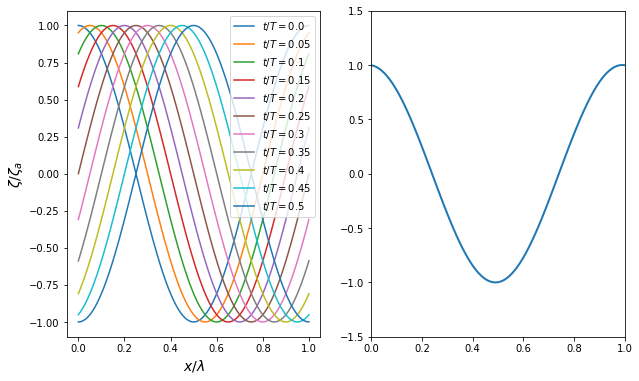

In [2]:
zeta = lambda t: A*np.cos(k*xvec-omega*t)

fig2 = plt.figure(figsize=(10,6))
ax1 = fig2.add_subplot(gs[0,0])
for t1 in tvec:
    ax1.plot(xvec/l, zeta(t1)/A, label='$t/T=${:.02}'.format(t1/T))    
ax1.set_xlabel('$x/\lambda$', fontsize=14)
ax1.set_ylabel('$\zeta/\zeta_a$', fontsize=14)
ax1.legend()

ax2 = fig2.add_subplot(gs[0,1])
ax2.set_xlim(( 0, 1.))
ax2.set_ylim((-1.5, 1.5))


#  Create animation
line, = ax2.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init2():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate2(i):
    dt = 0.01*T
    x = xvec/l
    z = zeta(i*dt)/A
    line.set_data(x, z)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2, frames=100, interval=20, blit=True)

HTML(anim2.to_html5_video())

We see that the wave propagate from left to right, i.e. in the positive $x$-direction. How can we make the wave propagate in the oppositie direction, in the the negative $x$-direction? Try to manipulate the expression for $\zeta(x,t)$ to make this happen. Hint: look at the expression for the phase.

# Linear wave theory
Linear wave theory (also known as Airy wave theory) in potential flow theory is the solution to a linearized wave boundary value problem (BVP) of a propagating free surface wave. Consider a right-going wave in waters of finite depth $h$, where the wave profile is given as $$\zeta(x,t)=\zeta_a\cos(kx-\omega t)$$
Then according to linear wave theory, the velocity potential (or wave potential) is $$\phi(x,z,t)=\frac{g\zeta_a}{\omega}\frac{\cosh(k(z+h))}{\cosh(kh)}\sin(kx-\omega t)$$

Reflection:
* Which assumptions must be made for the fluid to apply potential flow theory?
* What is defined as the positive $z$-direction in the given velocity potential above, and how could we confirm this?
* How should we define the velocity potential for a wave profile described by $\zeta(x,t)=\zeta_a\sin(kx-\omega t)$? (Hint: use the linearized kinematic free-surface condition)

At finite water depth, the wave speed depends on the water depth as given by the dispersion relation $$\omega^2=gk\tanh(kh)$$
If we know the wave number $k$ (or wavelength $\lambda$) it is easy to compute the wave frequency, however, if we know the wave freqency $\omega$ (or wave period $T$) and want to know the wave number $k$ (or wave length) we need to solve the dispersion relation for $k$. This can be done graphically by finding the zero-crossing of the nonlinear function $F(k)=\frac{gk}{\omega^2}-\frac{1}{\tanh(kh)}$.

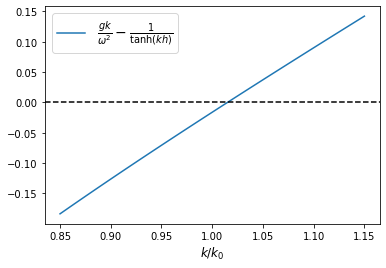

In [78]:
# Wave params:
T = 5.0
h = 15.0

omega=2.*np.pi/T
g = 9.81
k0 = omega**2/g  # Deep water wave number
kvec = np.linspace(0.85*k0,1.15*k0,100)

F = g*kvec/omega**2 - 1./np.tanh(kvec*h)

plt.figure()
plt.plot(kvec/k0, F, label=r'$\frac{gk}{\omega^2}-\frac{1}{\tanh(kh)}$')
plt.axhline(0.0, linestyle='--', color='k')
plt.xlabel('$k/k_0$', fontsize=12)
plt.legend(fontsize=14)

The dispersion relation can also be solved numerically for the wave number $k$. Let us have a look at how this is can be done using an iterative solver based on the Newton-Raphson method. For the iterative method, we need to specify a tolerance (TOL) limit for the error of the approximation. We should also specify a limit for maximum number of iterations, to avoid an infinite loop. However, the dispersion relation is a monotone function in the wave number $k$ such that the Newton-Raphson method will arrive at the solution after only few iterations.

In [79]:
def findWaveNumber(waveFrequency, waterDepth=None, IterMax=200, TOL=10.e-6):
    '''
    This function computes the wave number for a given wave frequency and water depth, by solving the dispersion relation for finite water depth.
    omega: [rad/s] Wave frequency
    h    : [m] Water depth
    '''
    omg = waveFrequency
    h = waterDepth
    g = 9.81
    k0 = omg** 2 / g
        
    if waterDepth is None:
        '''Deep water'''
        return k0

    else:
        '''Finite water depth'''
        for ii in range(1, IterMax):
            assert (ii < IterMax-1), "Solution did not converge."
            kh = k0*h
            F = g * k0 / omg**2 - 1.0 / np.tanh(kh)
            dF = g / omg**2 + 1.0 / np.sinh(kh) ** 2

            # Update estimate
            k = k0 - F / dF

            # Check residual and break if tolerance limit is reached
            epsilon = np.abs(k - k0) / k0;
            if epsilon < TOL:
                break
            else:
                k0 = k
        return k

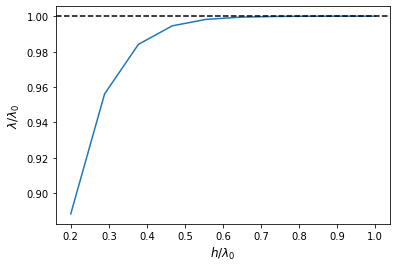

In [80]:
hdl0 = np.linspace(0.2,1.0,10)
T = 5.0
omega = 2*np.pi/T
k0 = omega**2/9.81
l0 = 2*np.pi/k0
kvec = [] # Create emply list to fill in computed values

for hdl in hdl0:
    h = hdl*l0
    kvec.append(findWaveNumber(omega, h))
    
# Print relative wavelength
lvec = 2*np.pi/np.array(kvec) # Note we must convert the python list to a numpy array to use it in calculations.

# Plot wave length against water depth, normalized by deep water wave length
fig = plt.figure()
ax=fig.add_subplot()
ax.plot(hdl0, lvec/l0)
ax.set_xlabel('$h/\lambda_0$', fontsize=12)
ax.set_ylabel('$\lambda/\lambda_0$', fontsize=12)
ax.axhline(1, linestyle='--', color='k')

## Flow variables
From the velocity potential we can easily compute the particle velocity in the fluid from $[u,w]=[\frac{\partial\phi}{\partial x}, \frac{\partial\phi}{\partial z}]$, local particle accelerations $[a_x,a_z]=[\frac{\partial^2\phi}{\partial x\partial t}, \frac{\partial^2\phi}{\partial z\partial t}]$ and the linear dynamic pressure $p=-\rho\frac{\partial \phi}{\partial t}$. This yields,
$$u=\omega\zeta_a\frac{\cosh(k(z+h))}{\sinh(kh)}\cos(kx-\omega t)$$
$$w=\omega\zeta_a\frac{\sinh(k(z+h))}{\sinh(kh)}\sin(kx-\omega t)$$
$$a_x=\omega^2\zeta_a\frac{\cosh(k(z+h))}{\sinh(kh)}\sin(kx-\omega t)$$
$$a_z=-\omega^2\zeta_a\frac{\sinh(k(z+h))}{\sinh(kh)}\cos(kx-\omega t)$$
$$p=\rho g\zeta_a\frac{\cosh(k(z+h))}{\sinh(kh)}\cos(kx-\omega t)$$
Let us implement these expressions in Python code to explore. It is convenient to make use of object oriented programming (OOP) and define a python *class* do model a linear wave with given wave period and wave amplitude for a given water depth. 

## Airywave python class
Let us name our class *airywave* and define the class structure, that is, what methods or functions do we want our class to include. We also need to define the *constructor* method, which is the *\_\_init\_\_()* function that is run when an instance of the class is created (i.e. when we use the class). The constructor typically holds the input parameter that is used to construct the class instance, which are stored within the object. The *self* parameter simply holds the parameters and functions of the object, such that they can be shared within the object. All functions belonging to the class mush have *self* as the first argument. The *pass* statement is convenient when building up a class structure. This makes it possible to test the code without the need to implement all the function bodies. Then, when developing the class further, one simply replace the *pass* statement with the relevant code expressions.

Looking at the above code lines, we should include some tests to check if input parameters are valid. For instance, we should only accept positive values of the wave period, wave amplitude and water depth. From above, we also see that the water depth has the default "value" *None*. This means that the class can be used without specifying the water depth (specification of water depth is optional), however, we must then inside the class define what to use as water depth. It is convenent to define the class such that if water depth is not given, we assume deep water. Ok, let us update our \_\_init\_\_() function with some test of parameters. We use the *assert* statement for the testing, which will throw an error if the test fails.  

At this point, you should try to change the block type above from *raw* to *code* and execute to see if it runs without errors. Let's make a test of our class below.

In [11]:
wave1 = airywave(5.0,1.0) # Create instance of the class with T=5.0 s and Zeta=1.0 m.

# Let's wave a look at the attributes of our class:
attrs = vars(wave1)
print(', '.join("%s: %s" % item for item in attrs.items()))

T: 5.0, A: 1.0, h: 390.32749793287337, g: 9.81, rho: 1000.0, omega: 1.2566370614359172, k0: 0.16097214109829736, l0: 39.03274979328734


Ok so far? Then we can implement the expressions required for our class methods. What should be considered regarding test of the input parameters/variables?

In [103]:
class airywave:
    def __init__(self, wavePeriod, waveAmplitude, waterDepth=None):
        
        assert (wavePeriod >= 0),"Wave period must be positive!"
        assert (waveAmplitude >= 0),"Wave amplitude must be positive!"

        self.T = wavePeriod
        self.A = waveAmplitude
        self.h = waterDepth
        
        # Constants:
        self.g = 9.81
        self.rho = 1000.

        # Derived parameters:
        self.omega = 2*np.pi/self.T    # Wave circular frequency 
        self.k0 = self.omega**2/self.g # Deep water wave number
        self.l0 = 2*np.pi/self.k0      # Deep water wave length        
        
        if waterDepth is not None:
            # Water depth is given as input parameter...
            assert (waterDepth >= 0),"Water depth must be positive!"
        else:
            self.h = 10.*self.l0  # Set deep water as 10 times deep water wave length

        # Compute the wave number for finite water deth
        self.k = findWaveNumber(self.omega, self.h)
        self.wavelen = 2*np.pi/self.k

        self.steepness = 2*self.A/self.wavelen # Wave steepness H/lambda
        
    def getParticleVelocity(self,x,z,t):
        
        # Check if z-coordinate(s) is out of range. (should be in the range [-h,0])
        if isinstance(z, type(np.array)):
            assert (np.max(z) <= 0. and np.min(z) >= -self.h), "Input z-coordinate is out of range!"
        if isinstance(z, float):
            assert (z <= 0. and z >= -self.h), "Input z-coordinate is out of range!"
            
        fz1 = np.cosh(self.k*(z+self.h))/np.sinh(self.k*self.h)
        u = self.omega*self.A*fz1*np.cos(self.k*x-self.omega*t)
        
        fz2 = np.sinh(self.k*(z+self.h))/np.sinh(self.k*self.h)
        w = self.omega*self.A*fz2*np.sin(self.k*x-self.omega*t)
        
        return u, w
        
    
    def getParticleAcceleration(self,x,z,t):

        # Check if z-coordinate(s) is out of range. (should be in the range [-h,0])
        if isinstance(z, type(np.array)):
            assert (np.max(z) <= 0. and np.min(z) >= -self.h), "Input z-coordinate is out of range!"
        if isinstance(z, float):
            assert (z <= 0. and z >= -self.h), "Input z-coordinate is out of range!"
            
        fz1 = np.cosh(self.k*(z+self.h))/np.sinh(self.k*self.h)
        ax = self.omega**2*self.A*fz1*np.sin(self.k*x-self.omega*t)
        
        fz2 = np.sinh(self.k*(z+self.h))/np.sinh(self.k*self.h)
        az = -self.omega**2*self.A*fz2*np.cos(self.k*x-self.omega*t)
        
        return ax, az
    
    def getDynamicPressure(self,x,z,t):

        # Check if z-coordinate(s) is out of range. (should be in the range [-h,0])
        if isinstance(z, type(np.array)):
            assert (np.max(z) <= 0. and np.min(z) >= -self.h), "Input z-coordinate is out of range!"
        if isinstance(z, float):
            assert (z <= 0. and z >= -self.h), "Input z-coordinate is out of range!"
        
        fz = np.cosh(self.k*(z+self.h))/np.cosh(self.k*self.h)
        p = self.rho*self.g*self.A*fz*np.cos(self.k*x-self.omega*t)
        
        return p
        
    def getSurfaceElevation(self,x,t):
        
        zeta = self.A*np.cos(self.k*x-self.omega*t)
        return zeta
    
    def getParticleMotion(self,x,z,t):

    # Check if z-coordinate(s) is out of range. (should be in the range [-h,0])
        if isinstance(z, type(np.array)):
            assert (np.max(z) <= 0. and np.min(z) >= -self.h), "Input z-coordinate is out of range!"
        if isinstance(z, float):
            assert (z <= 0. and z >= -self.h), "Input z-coordinate is out of range!"
    
        xp = self.A*np.cosh(self.k*(z+self.h))/np.sinh(self.k*self.h)*(np.sin(self.k*x-self.omega*t) - np.sin(self.k*x))
        yp = self.A*np.sinh(self.k*(z+self.h))/np.sinh(self.k*self.h)*(np.cos(self.k*x-self.omega*t) - np.cos(self.k*x))
        
        return xp, yp

Let us test our class and plot some results.

Water-depth to wave-length ratio: 0.641


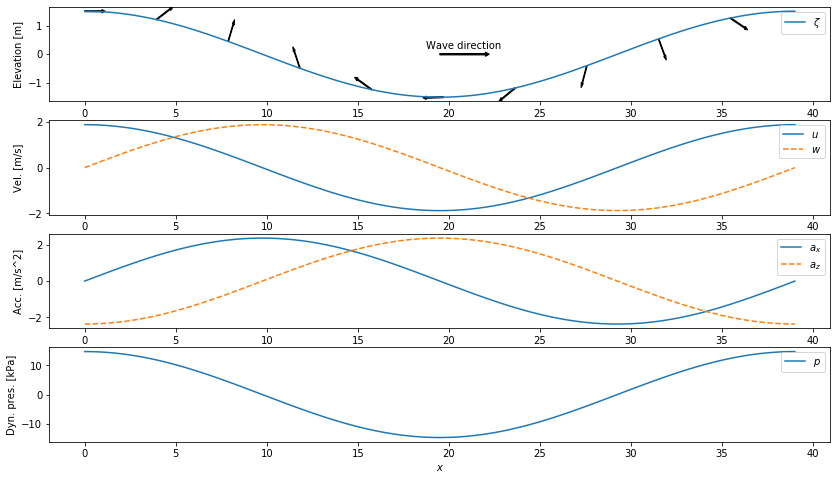

In [133]:
# Set wave parameters:
T = 5.0 # [s] Wave period
A = 1.5 # [m] Wave amplitude
h = 25. # [m] Water depth

wave1 = airywave(T, A, h)

# Discretization of x-axis (one wave length)
wavelength = wave1.wavelen
xvec = np.linspace(0,wavelength, 100)

print('Water-depth to wave-length ratio: {:.3}'.format(h/wavelength))

# Compute flow variables along x-axis on z=0 and t=0:
u, w = wave1.getParticleVelocity(xvec, 0, 0)
ax, az = wave1.getParticleAcceleration(xvec, 0, 0)
p = wave1.getDynamicPressure(xvec, 0, 0)
zeta = wave1.getSurfaceElevation(xvec, 0)

# Scale velocity vectors for plotting
scale = 0.5

# Plot results
gs = gridspec.GridSpec(nrows=4, ncols=1)
fig = plt.figure(figsize=(14,8))

# Plot surface elevation:
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(xvec, zeta, label='$\zeta$')
ax1.arrow(0.5*wavelength, 0.0, 2.5, 0.0, width=0.05, color='k')
for ii in range(0,len(xvec),10):
    ax1.arrow(xvec[ii], zeta[ii], scale*u[ii], scale*v[ii], width=0.04, color='k')
ax1.text(0.48*wavelength, 0.2, "Wave direction")
ax1.set_ylabel('Elevation [m]')
ax1.legend()

# Plot particle velocity components:
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(xvec, u, label='$u$')
ax2.plot(xvec, w, '--', label='$w$')
ax2.set_ylabel('Vel. [m/s]')
ax2.legend()

# Plot local acceleration components:
ax3 = fig.add_subplot(gs[2,0])
ax3.plot(xvec, ax, label='$a_x$')
ax3.plot(xvec, az, '--', label='$a_z$')
ax3.set_ylabel('Acc. [m/s^2]')
ax3.legend()

# Plot linear dynamic pressure:
ax4 = fig.add_subplot(gs[3,0])
ax4.plot(xvec, p*1.e-3, label='$p$')
ax4.set_ylabel('Dyn. pres. [kPa]')
ax4.set_xlabel('$x$')
ax4.legend()


Then let us have a look at the depth dependence

0.07931356350274987


(-25, 5)

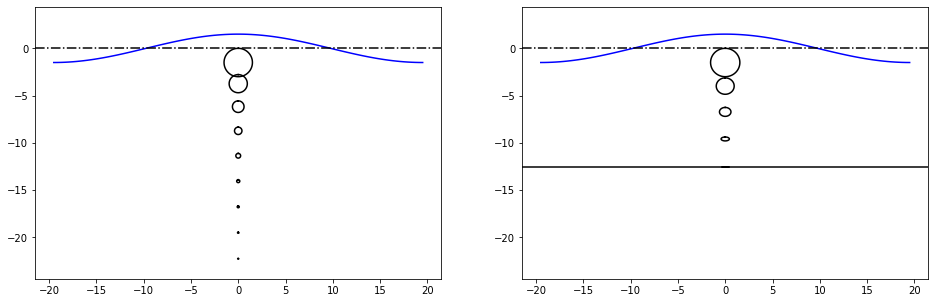

In [128]:
# Define points for evaluation of particle motion:
# Deep water wave:
zcvec = np.linspace(-h,0,10)
xcvec = np.zeros_like(zcvec)

# Finite depth wave:
zc2vec = np.linspace(-h*0.5,0,5)
xc2vec = np.zeros_like(zc2vec)

x0vec = np.linspace(-wave1.wavelen*0.5,wave1.wavelen*0.5, len(zeta))
zeta0 = wave1.getSurfaceElevation(x0vec, 0.)

# Create wave instance at smaller depth
wave2 = airywave(T,A,0.5*h)

# Discrete time (one wave period)
tvec, dt = np.linspace(0,T,100, retstep=True)

# Prepare figure window for plotting..
gs = gridspec.GridSpec(nrows=1, ncols=2)
fig = plt.figure(figsize=(16,5))

# Plot deep water wave
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(x0vec, zeta0, 'b')
ax1.axhline(0, linestyle='-.', color='k')
ax1.axhline(-h, color='k')

# Plot finite depth wave
ax2 = fig.add_subplot(gs[0,1])
ax2.plot(x0vec, zeta0, 'b')
ax2.axhline(0, linestyle='-.', color='k')
ax2.axhline(-h*0.5, color='k')

# Loop over points for plotting of path
for xc,zc in zip(xcvec, zcvec):
    xp1, zp1 = wave1.getParticleMotion(xc, zc, tvec)
    ax1.plot(xp1+xc, zp1+zc, 'k')

# Loop over points for plotting of path
for xc, zc in zip(xc2vec, zc2vec):
    xp2, zp2 = wave2.getParticleMotion(xc, zc, tvec)
    ax2.plot(xp2+xc, zp2+zc, 'k')

# Set equal scaling of axes to view true shape of the paths
ax1.axis('equal')
ax1.set_ylim(ymin=-25, ymax=5)

ax2.axis('equal')
ax2.set_ylim(ymin=-25, ymax=5)

We see that for deep water (left figure above), the water particles move in circular paths. At finite water depth, the particle paths becomes ellipses. At the seabed the particle motion becomes one-dimensional (horizontal).  

# Group velocity
When waves of different freqency interact, a wave group is obtained. The wave group moves at a speed different from the wave speed (phase speed). This can be shown matematically if we add two regular wave components $\zeta_1$ and $\zeta_2$, such that the resulting wave becomes $$\zeta(x,t)=\zeta_1+\zeta_2=\zeta_a\cos((k+\delta k)x - (\omega + \delta\omega)t)+\zeta_a\cos(kx - \omega t)$$
Using the trigonometric identity $$\cos\alpha+\cos\beta=2\cos\left(\frac{\alpha-\beta}{2}\right)\cos\left(\frac{\alpha+\beta}{2}\right)$$ we can write $$\zeta=2\zeta_a\cos\left(\frac{\delta kx-\delta\omega t}{2}\right)\cos\left(\frac{2kx-2\omega t}{2}+\frac{\delta kx-\delta\omega t}{2}\right)$$
We assume that $\delta k << k$ and $\delta\omega << \omega$ such that we can make the approximation
$$\zeta=2\zeta_a\cos\left(\frac{\delta kx-\delta\omega t}{2}\right)\cos\left(kx-\omega t\right)$$
Which represent a wave with slowly varying amplitude $A$,
$$\zeta=A\cos(kx-\omega t)$$. Let us make an animation of this wave group.

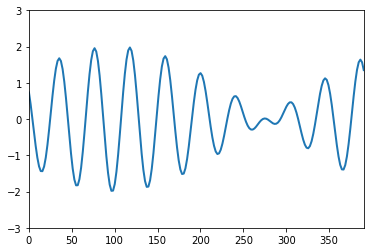

In [141]:
# Let us make two deep water wave instances, waveA and waveB
T = 5.
A = 1.

dT = 0.3

waveA = airywave(T, A)
waveB = airywave(T+dT, A)

xvec = np.linspace(0, 10*waveA.wavelen, 200)

# The resulting wave is the superposition of these two.

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_xlim(( 0, xvec[-1]))
ax1.set_ylim((-3*A, 3*A))


#  Create animation
line, = ax1.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    dt = 0.01*T
    x = xvec
    z = waveA.getSurfaceElevation(x, i*dt) + waveB.getSurfaceElevation(x, i*dt)
    line.set_data(x, z)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=20, blit=True)

HTML(anim.to_html5_video())

We see from the above animation that the individual waves propagate faster than the wave group. The wave group is defined by the previously defined time-dependent wave amplitude $$A=2\zeta_a\cos\left(\frac{\delta kx-\delta\omega t}{2}\right)$$. If we look at the phase of the cosine expression defining the time variation, we can write $0.5\delta k(x-\frac{\delta}{\delta k}\omega t)$. It is clear that the wave group moves with the velocity $\delta\omega/\delta k$. In the limit $\delta\omega\rightarrow 0$, we obtain the *group velocity* as $$C_g=\frac{\mathrm{d}\omega}{\mathrm{d}k},$$which from the dispersion relation $\omega^2=gk\tanh(kh)$ yields
$$2\omega\frac{\mathrm{d}\omega}{\mathrm{d}k}=g\tanh(kh)+\frac{gkh}{\cosh^2(kh)}$$ or
$$\frac{\mathrm{d}\omega}{\mathrm{d}k}=\frac{g\tanh(kh)}{2\omega}+\frac{gkh}{2\omega\cosh^2(kh)}$$.
Using the relation $2\sinh(kh)\cosh(kh)=\sinh(2kh)$ and $\omega=kC_w$, we obtain
$$C_g=\frac{C_w}{2}\left(1+\frac{2kh}{\sinh(2kh)}\right)$$
For deep water ($\lim kh\rightarrow\infty$), the group velocity reduces to
$$C_g=\frac{C_w}{2}$$

> Some classical literature on water waves:
> * Lamb (1932), *Hydrodynamics*, Chapt. IX. (https://archive.org/details/hydrodynamics00lamb/page/n13/mode/2up)
> * Wehausen and Laitone (1960), *Surface Waves* (https://surfacewaves.berkeley.edu/pdf/p446-476.pdf)